<a href="https://colab.research.google.com/github/marwa-khafagy/Workshops/blob/main/Workshop_2_Demo_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all needed libraries and sublibraries
import tensorflow as tf
import keras.backend as x
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [5]:
# Import input (x) and output (y) data, and asign these to df1 and df2

df1 = pd.read_csv('input_data.csv')

df2 = pd.read_csv('output_data.csv')

In [6]:
# Scale input data -> Some are magnitudes larfer but will not have magnitude larger correlation

df1 = preprocessing.scale(df1) # not sure why ywet

# No need to scale output -> 0 or 1

In [7]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data,
# with training data being 80% of the data, and testing data being the remaining 20% of the data


X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2) # test data will be 20%, and training will be 80%
# don't want to train on the exact same data

In [8]:
# Define a "shallow" logistic regression model
# Binary classification problem

# Model type
model = Sequential()
# Input layer with 30 neurons -> One for each input parameter
# Connects to a single hidden layer with 13 neurons -> with a relu activation function
model.add(Dense(13, input_shape=(30,), activation='relu'))
# Connects to single output layer neuron -> with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))
# Binary cross entropy for loss
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics = ['accuracy'])

In [9]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
# Reduces training time and prevents overfitting

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0,callbacks = [earlystopper])

history_dict=history.history

Epoch 207: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 640x480 with 0 Axes>

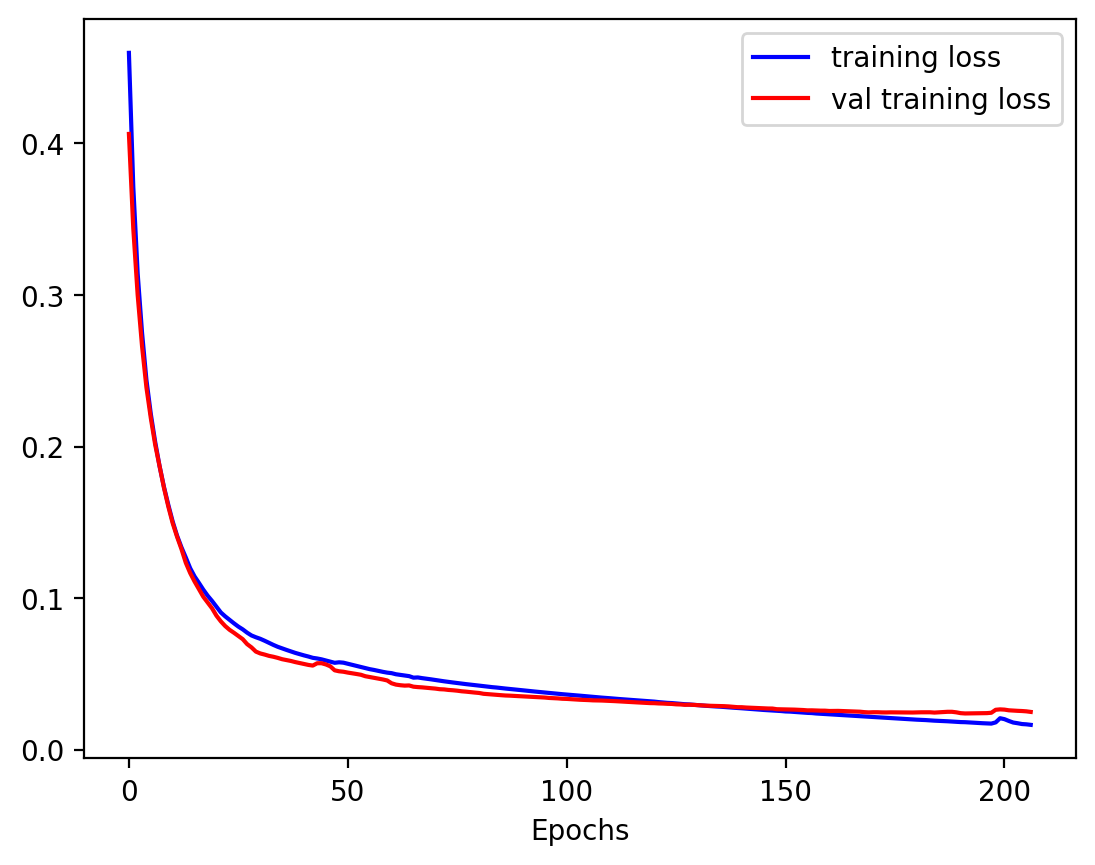

In [10]:
# Plot training loss and validation split loss over the epochs
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values, 'b', label="training loss")
plt.plot(val_loss_values, 'r', label="val training loss")
plt.legend()
plt.xlabel("Epochs")


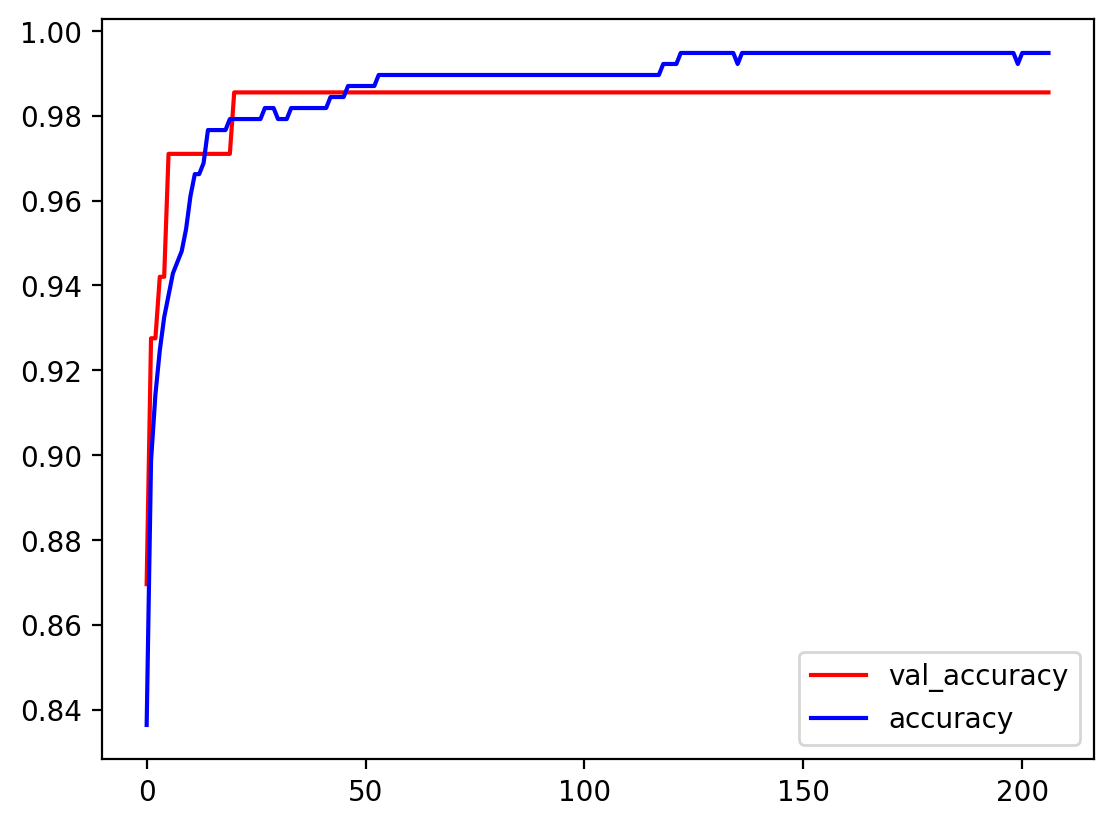

In [11]:
# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()

In [12]:
# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

4/4 [==============================] - 0s 8ms/step - loss: 0.0906 - accuracy: 0.9737
Test loss:  0.09059815853834152
Test accuracy:  0.9736841917037964


In [13]:
# AUC score of testing data
# Area Under Curve -> Ideal = 1

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)



4/4 [==============================] - 0s 4ms/step
Testing data AUC:  0.9926495155362511


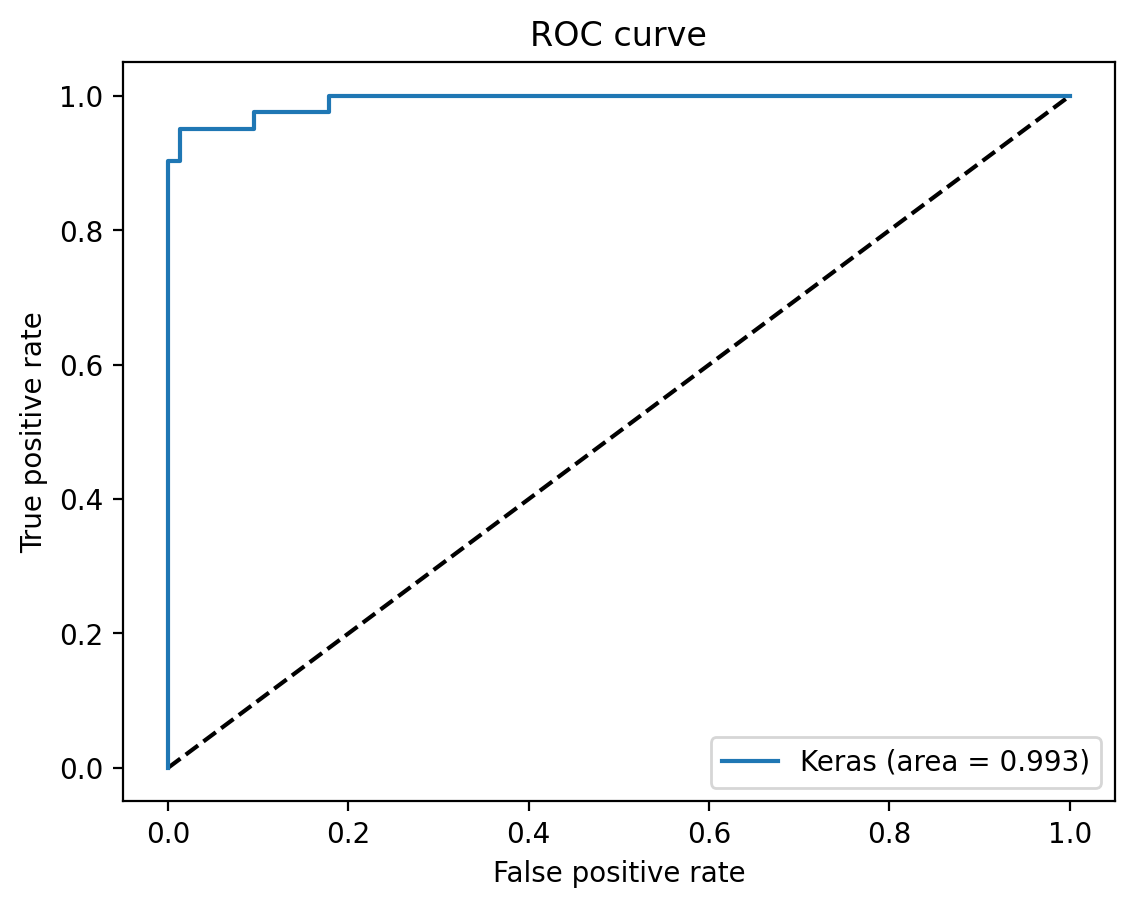

In [14]:
# ROC curve of testing data
# Receiver Operating Charcterisic

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [15]:
# AUC score of training data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train,y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)


15/15 [==============================] - 0s 2ms/step
Training data AUC:  1.0


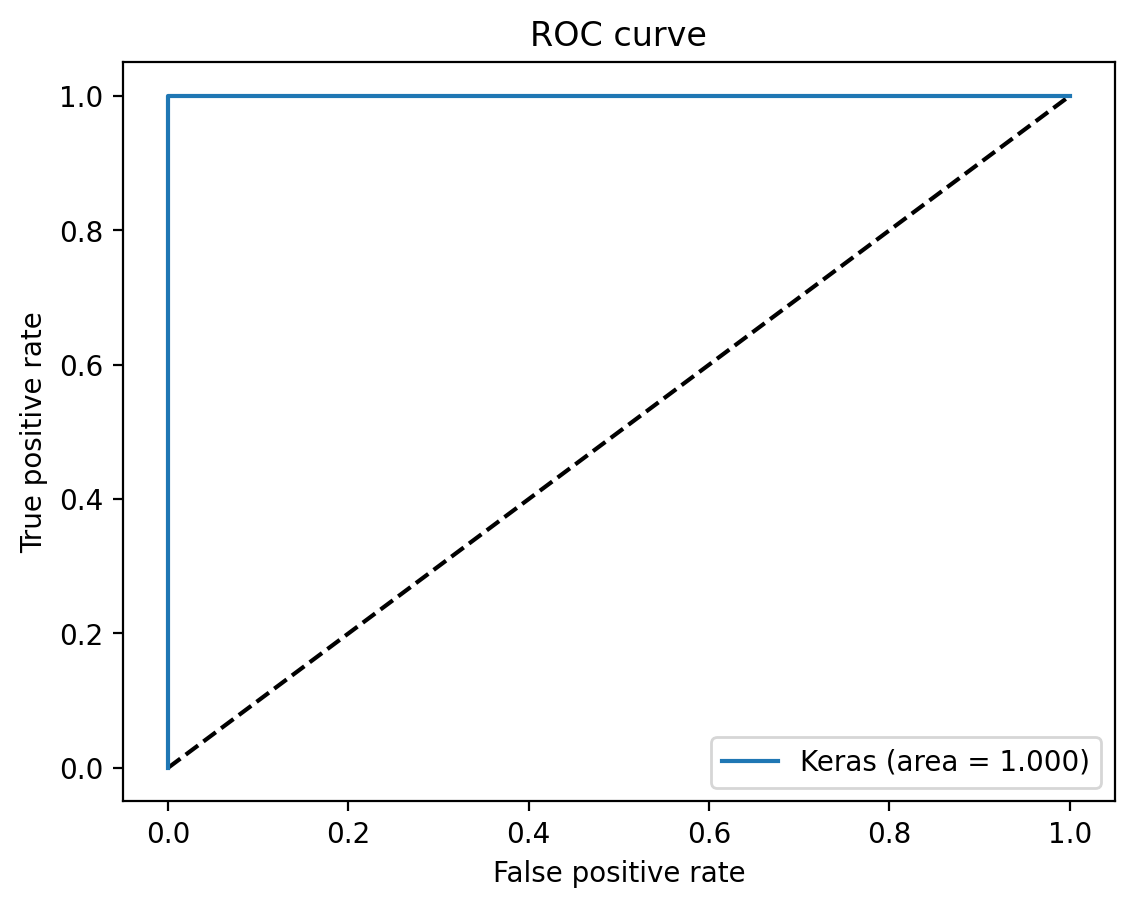

In [16]:
# ROC curve of training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [ ]:
# Make y_train categorical and assign this to y_train_cat
y_train_cat = to_categorical(y_train)
# y_train_cat = to_categorical(y_train)

In [ ]:
# print(y_train)

In [ ]:
# print(y_train_cat)

In [ ]:
#Define a "shallow" softmax regression model

model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])


In [ ]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
# earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# # Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
# history = model.fit(X_train, y_train_cat, epochs = 2000, validation_split = 0.15, verbose = 0,
#                     callbacks = [earlystopper])

# history_dict=history.history

Epoch 219: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 640x480 with 0 Axes>

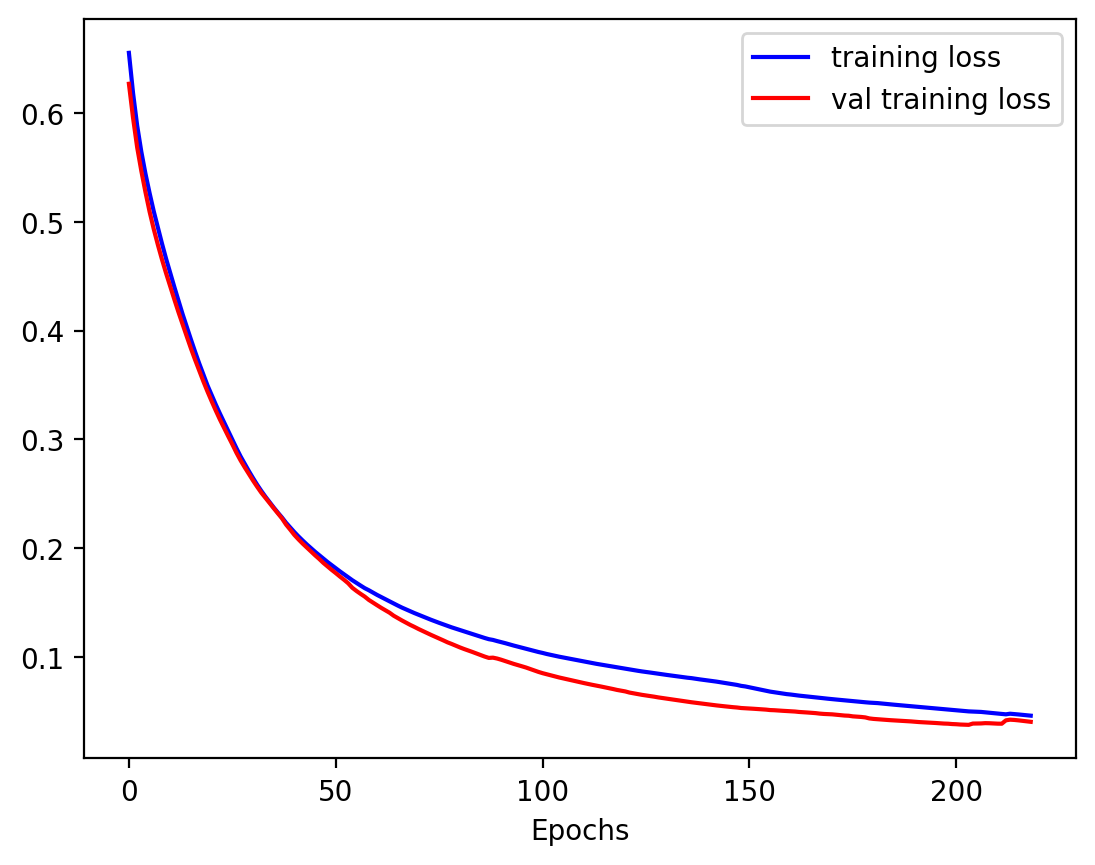

In [ ]:
# Plot training loss and validation split loss over the epochs

# loss_values = history_dict['loss']
# val_loss_values=history_dict['val_loss']
# plt.figure()
# plt.figure()
# plt.plot(loss_values,'b',label='training loss')
# plt.plot(val_loss_values,'r',label='val training loss')
# plt.legend()
# plt.xlabel("Epochs")

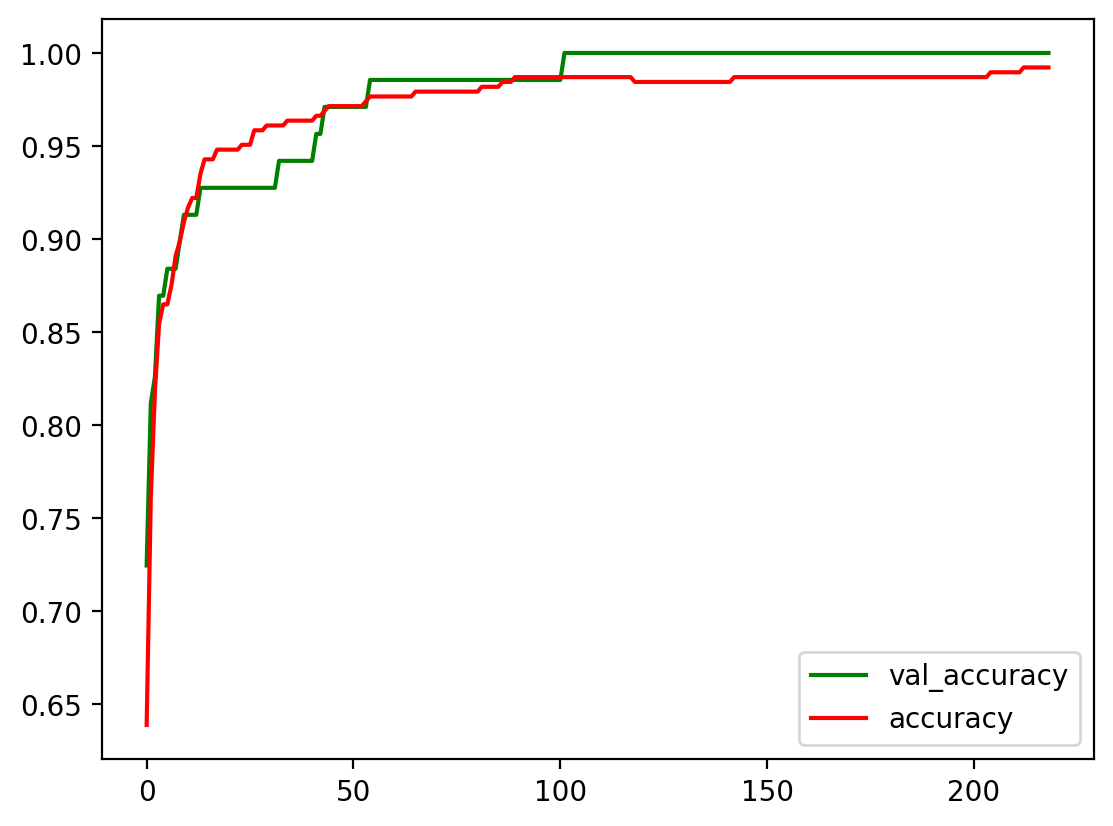

In [ ]:
# Plot accuracy over the epochs

# accuracy_values = history_dict['accuracy']
# val_accuracy_values=history_dict['val_accuracy']
# plt.plot(val_accuracy_values,'-g',label='val_accuracy')
# plt.plot(accuracy_values,'-r',label='accuracy')
# plt.legend()

In [ ]:
# Calculate loss and accuracy of testing data

# y_test_cat = to_categorical(y_test)
# loss, acc = model.evaluate(X_test, y_test_cat)
# print("Test loss: ", loss)
# print("Test accuracy: ", acc)

4/4 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9649
Test loss:  0.12003627419471741
Test accuracy:  0.9649122953414917


In [ ]:
# AUC score of testing data

# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# y_test_pred = model.predict(X_test)
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
# auc_keras = auc(fpr_keras, tpr_keras)
# print('Testing data AUC: ', auc_keras)

4/4 [==============================] - 0s 3ms/step
Testing data AUC:  0.9905844155844156


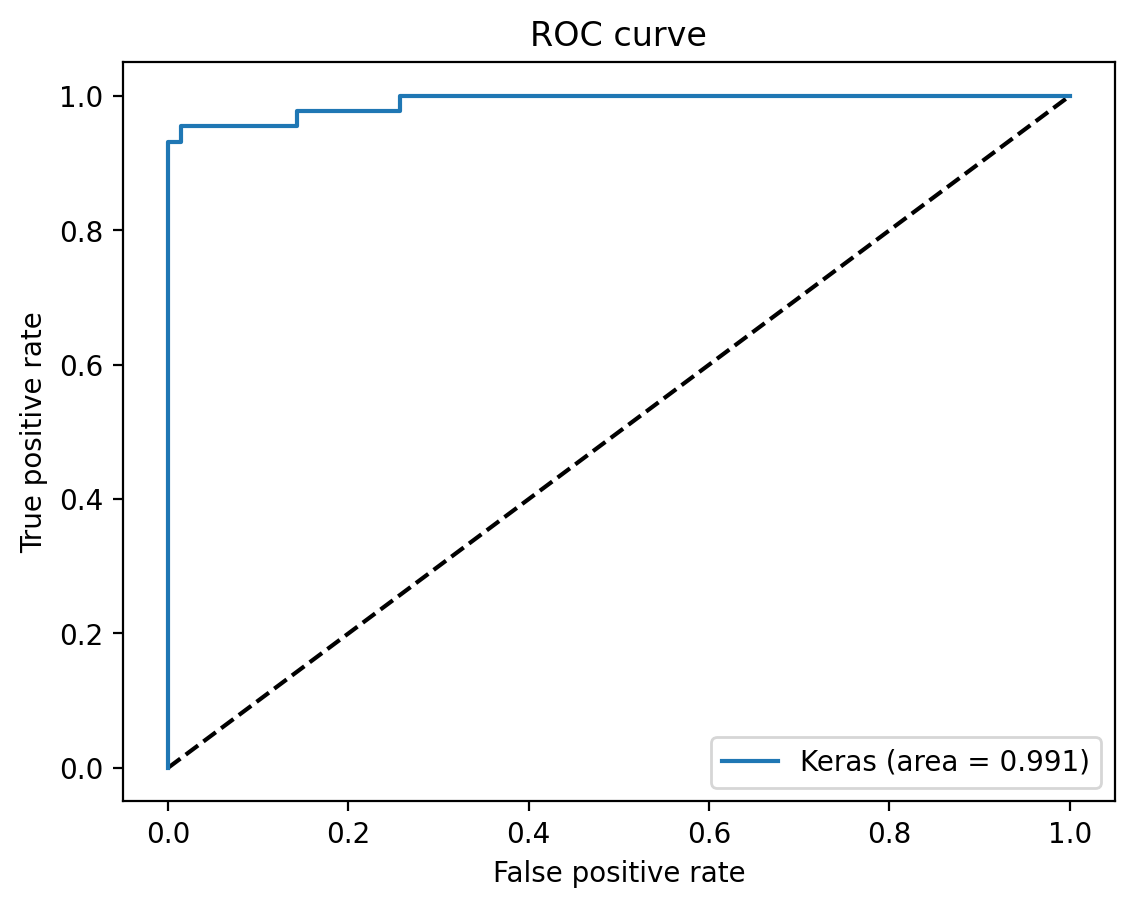

In [ ]:
# ROC curve of testing data

# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

In [ ]:
# AUC score of training data

# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# y_train_pred = model.predict(X_train)
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
# auc_keras = auc(fpr_keras, tpr_keras)
# print('Testing data AUC: ', auc_keras)

15/15 [==============================] - 0s 2ms/step
Testing data AUC:  0.9991862963967536


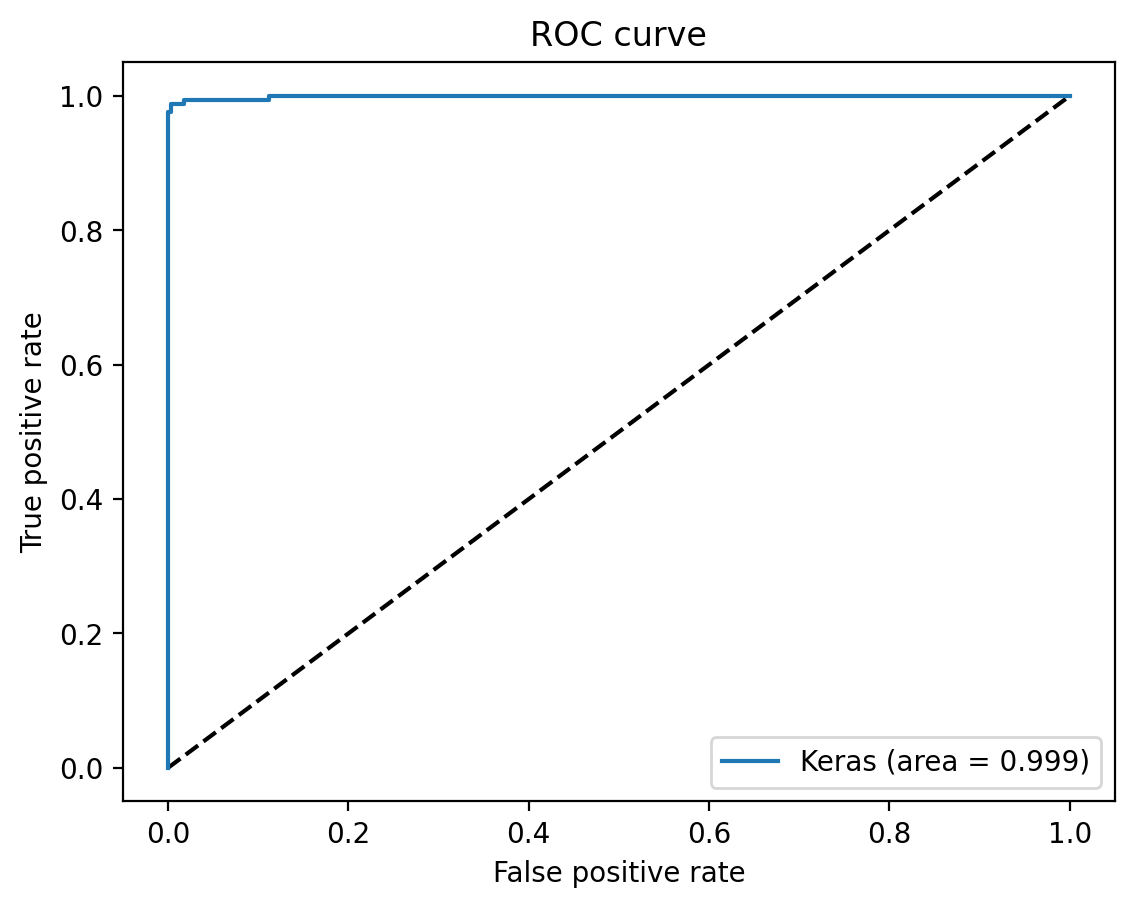

In [ ]:
# ROC curve of training data

# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

In [ ]:
# Define a "deep" softmax regression model

model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [ ]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
# earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

# # Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
# history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0,
#                     callbacks = [earlystopper])
# history_dict = history.history

Epoch 160: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 640x480 with 0 Axes>

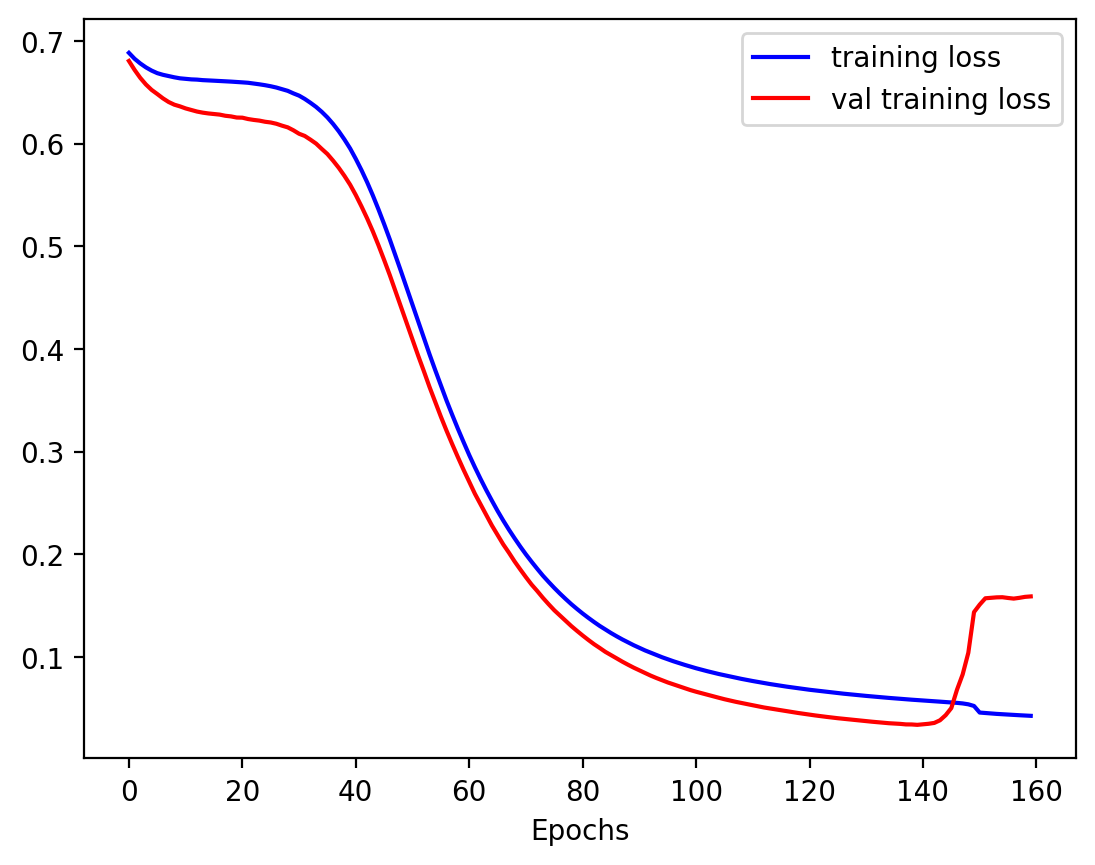

In [ ]:
# Plot training loss and validation split loss over the epochs

# loss_values = history_dict['loss']
# val_loss_values=history_dict['val_loss']
# plt.figure()
# plt.figure()
# plt.plot(loss_values,'b',label='training loss')
# plt.plot(val_loss_values,'r',label='val training loss')
# plt.legend()
# plt.xlabel("Epochs")

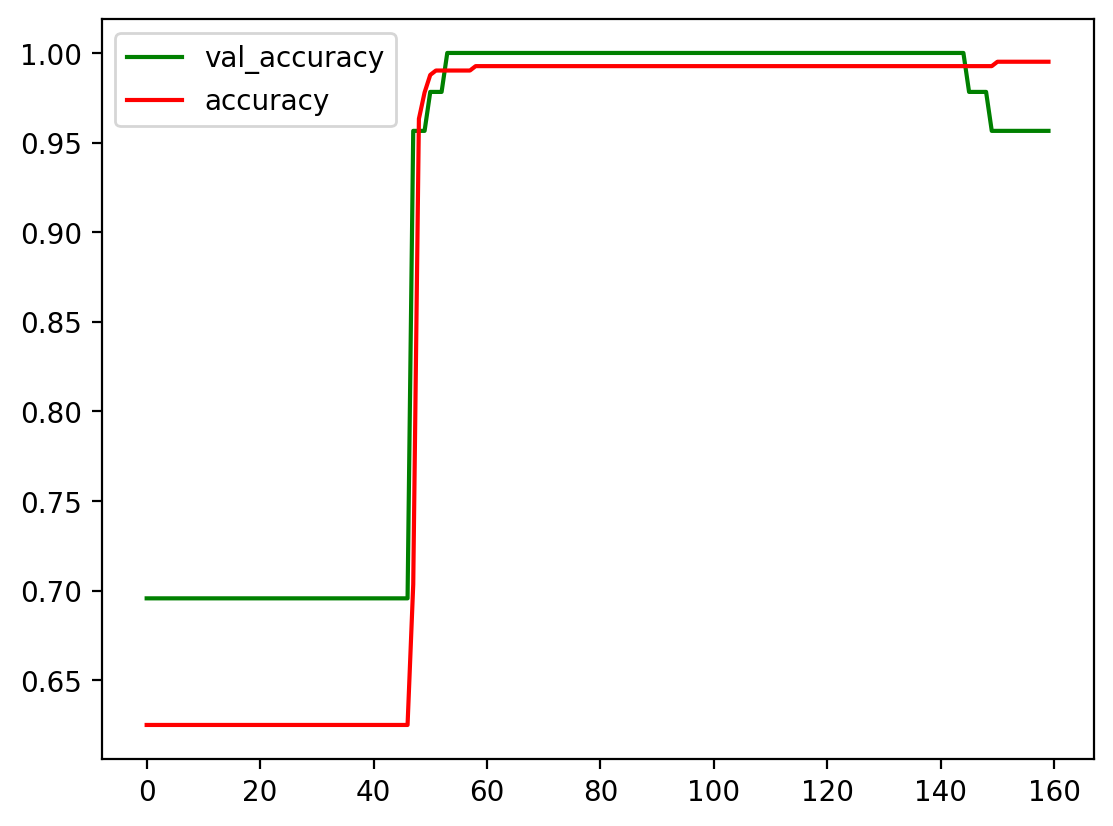

In [ ]:
# Plot accuracy over the epochs

# accuracy_values = history_dict['accuracy']
# val_accuracy_values=history_dict['val_accuracy']
# plt.plot(val_accuracy_values,'-g',label='val_accuracy')
# plt.plot(accuracy_values,'-r',label='accuracy')
# plt.legend()

In [ ]:
# Calculate loss and accuracy of testing data

# y_test_cat = to_categorical(y_test)
# loss, acc = model.evaluate(X_test, y_test_cat)
# print("Test loss: ", loss)
# print("Test accuracy: ", acc)

4/4 [==============================] - 0s 5ms/step - loss: 0.1646 - accuracy: 0.9561
Test loss:  0.16455896198749542
Test accuracy:  0.9561403393745422


In [ ]:
# AUC score of testing data

# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# y_test_pred = model.predict(X_test)
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
# auc_keras = auc(fpr_keras, tpr_keras)
# print('Testing data AUC: ', auc_keras)

4/4 [==============================] - 0s 3ms/step
Testing data AUC:  0.9853896103896105


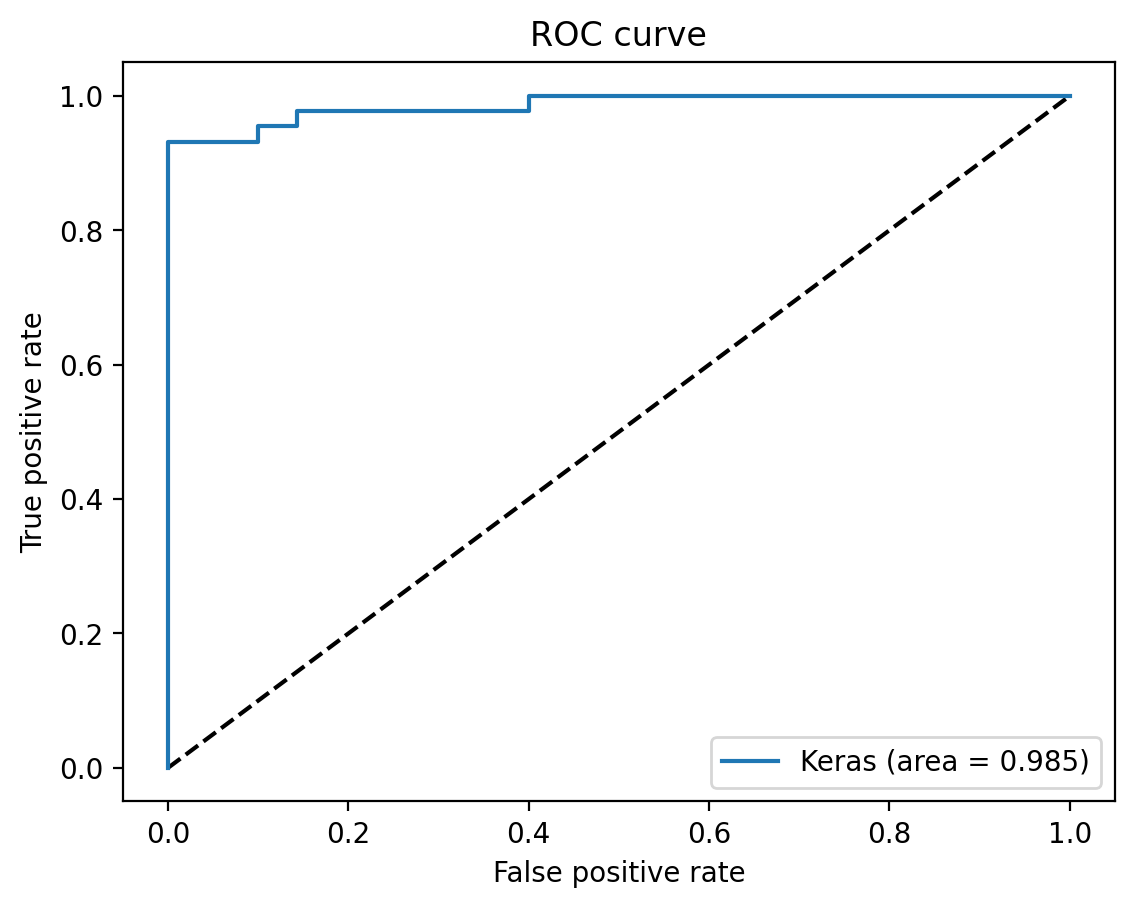

In [ ]:
# ROC curve of testing data

# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

In [ ]:
# AUC score of training data

# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# y_train_pred = model.predict(X_train)
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
# auc_keras = auc(fpr_keras, tpr_keras)
# print('Testing data AUC: ', auc_keras)

15/15 [==============================] - 0s 2ms/step
Testing data AUC:  0.9945961735066452


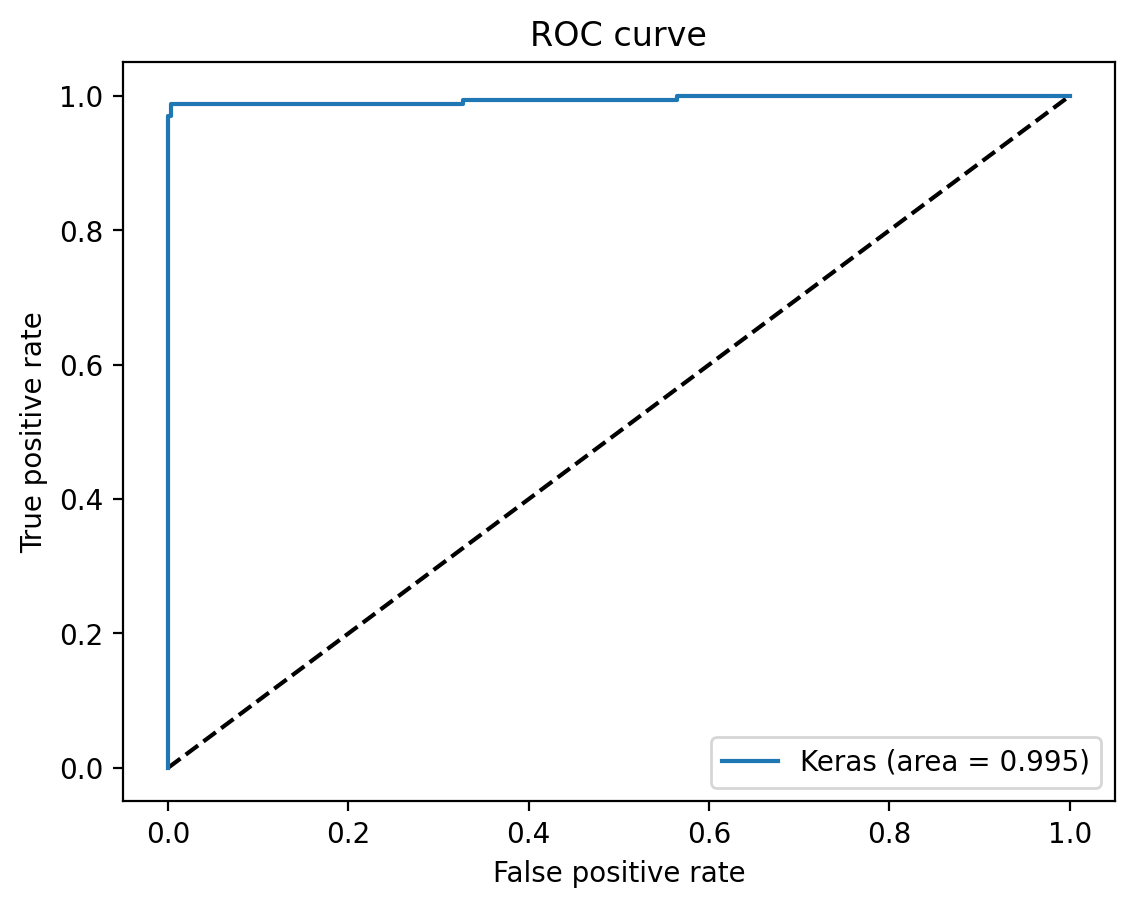

In [ ]:
# ROC curve of training data

# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()